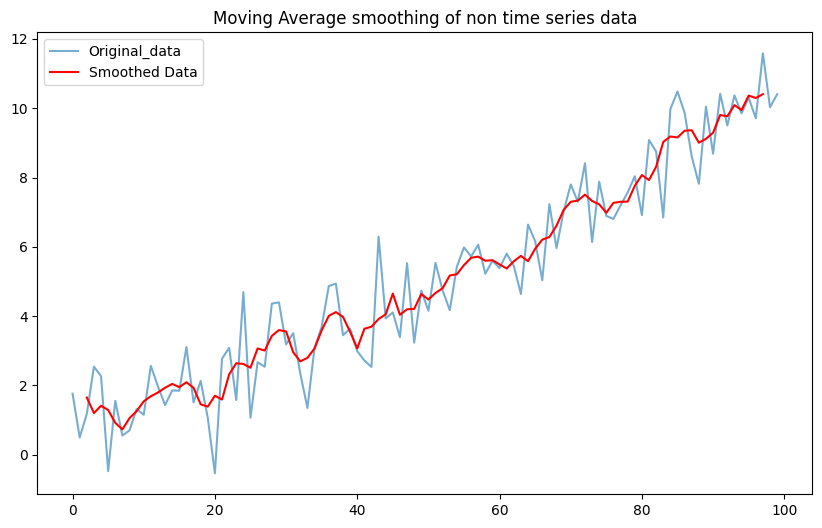

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
data = np.linspace(0, 10, 100) + np.random.normal(0, 1, 100)

def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode= 'valid')

smoothed_data= moving_average(data, 5)

plt.figure(figsize= (10, 6))
plt.plot(data, label= 'Original_data', alpha= 0.6)
plt.plot(np.arange(len(smoothed_data)) + 2, smoothed_data, label= 'Smoothed Data', color= 'red')
plt.legend()
plt.title("Moving Average smoothing of non time series data")
plt.show()

### Simple Moving Average

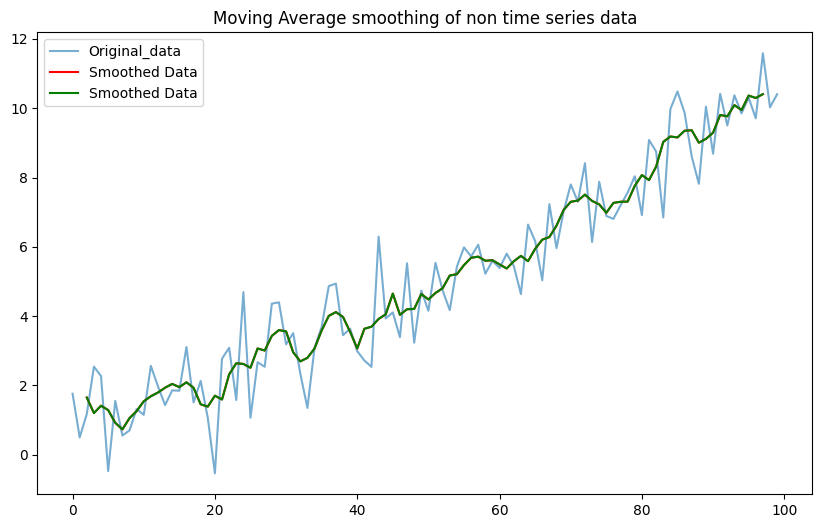

In [6]:
def simple_moving_average(data, window_size):
    """ Computes the simple moving average for given data"""
    sma = []
    for i in range(len(data) - window_size + 1):
        window = data[i:i + window_size]
        window_average = sum(window) / window_size
        sma.append(window_average)
        
    return sma


sma = simple_moving_average(data, 5)

plt.figure(figsize= (10, 6))
plt.plot(data, label= 'Original_data', alpha= 0.6)
plt.plot(np.arange(len(sma)) + 2, sma, label= 'Smoothed Data', color= 'red')
plt.plot(np.arange(len(smoothed_data)) + 2, smoothed_data, label= 'Smoothed Data', color= 'green')
plt.legend()
plt.title("Moving Average smoothing of non time series data")
plt.show()

C:\Users\disha\AppData\Local\Temp\ipykernel_5204\1477692249.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  cma_value = cumulative_sum / i + 1


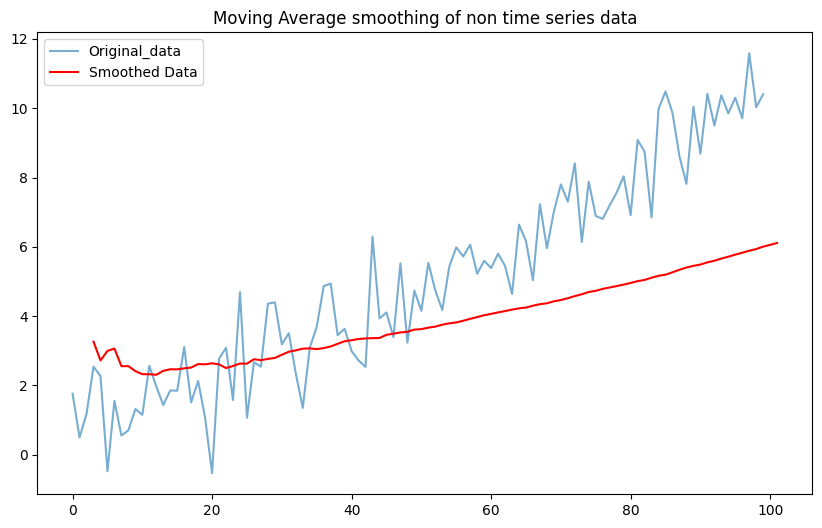

In [7]:
def continous_moving_average(data):
    cma = []
    cumulative_sum = 0
    
    for i in range(len(data)):
        cumulative_sum += data[i]
        cma_value = cumulative_sum / i + 1
        cma.append(cma_value)
        
    return cma

cma = continous_moving_average(data)

plt.figure(figsize= (10, 6))
plt.plot(data, label= 'Original_data', alpha= 0.6)
plt.plot(np.arange(len(cma)) + 2, cma, label= 'Smoothed Data', color= 'red')
plt.legend()
plt.title("Moving Average smoothing of non time series data")
plt.show()

In [8]:
def weighted_moving_average(data, window_size):
    """Computes the weighted moving average (WMA) for the given data."""
    wma = []
    weights = list(range(1, window_size + 1))  # Create a list of weights [1, 2, ..., window_size]
    total_weight = sum(weights)  # Sum of weights
    
    for i in range(len(data) - window_size + 1):
        window = data[i:i + window_size]  # Extract the current window
        weighted_sum = sum(window[j] * weights[j] for j in range(window_size))  # Compute the weighted sum
        wma_value = weighted_sum / total_weight  # Normalize by total weight
        wma.append(wma_value)
    
    return wma

# Example dataset (raw data)
data = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

# Set the window size
window_size = 3

# Compute the WMA
wma = weighted_moving_average(data, window_size)

# Output the result
print("Original Data: ", data)
print(f"Weighted Moving Average (window size {window_size}):", wma)


Original Data:  [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
Weighted Moving Average (window size 3): [3.6666666666666665, 5.666666666666667, 7.666666666666667, 9.666666666666666, 11.666666666666666, 13.666666666666666, 15.666666666666666, 17.666666666666668]


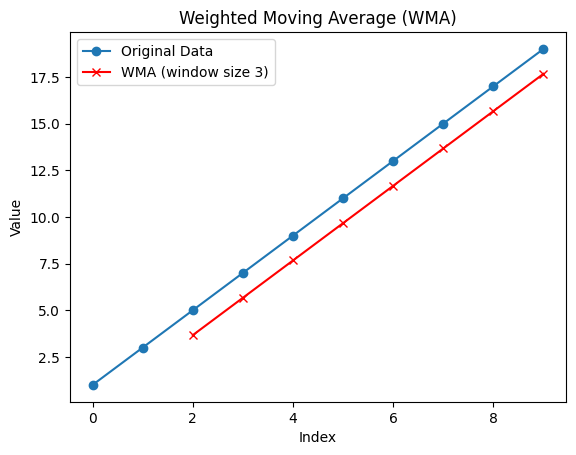

In [9]:

# Plot the original data
plt.plot(data, label="Original Data", marker='o')

# Plot the WMA
plt.plot(range(window_size - 1, len(data)), wma, label=f"WMA (window size {window_size})", marker='x', color='red')

# Add labels and legend
plt.title("Weighted Moving Average (WMA)")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

### Exponentially Moving Average

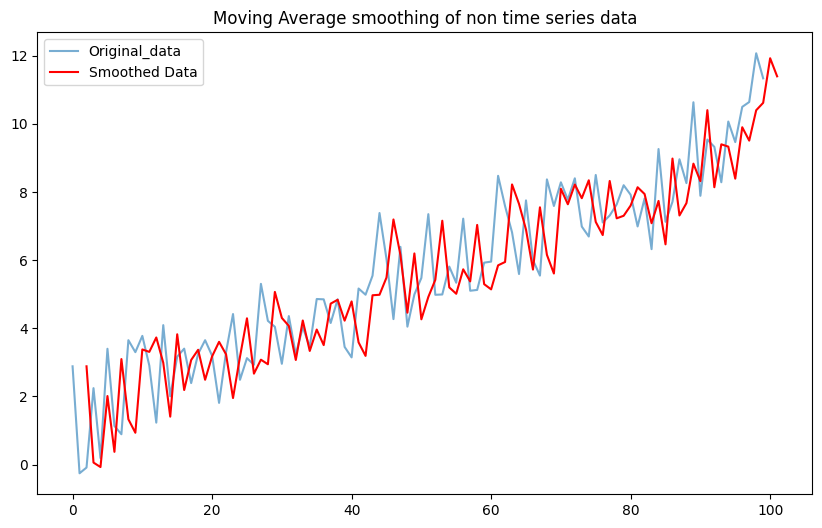

In [12]:
def ema_iterative(data, alpha):
    ema_values = []
    ema = data[0]  # Start with the first data point
    for price in data:
        ema = (1 - alpha) * ema + alpha * price
        ema_values.append(ema)
    return ema_values

def ema_recursive(data, alpha, index=0, ema=None):
    if ema is None:
        ema = data[0]  # Start with the first data point
    if index == len(data):
        return []
    else:
        ema = (1 - alpha) * ema + alpha * data[index]
        return [ema] + ema_recursive(data, alpha, index + 1, ema)

data = np.linspace(1, 10, 100) + np.random.normal(0, 1, 100)

smoothed_data = ema_recursive(data, 0.9)
plt.figure(figsize= (10, 6))
plt.plot(data, label= 'Original_data', alpha= 0.6)
plt.plot(np.arange(len(smoothed_data)) + 2, smoothed_data, label= 'Smoothed Data', color= 'red')
plt.legend()
plt.title("Moving Average smoothing of non time series data")
plt.show()

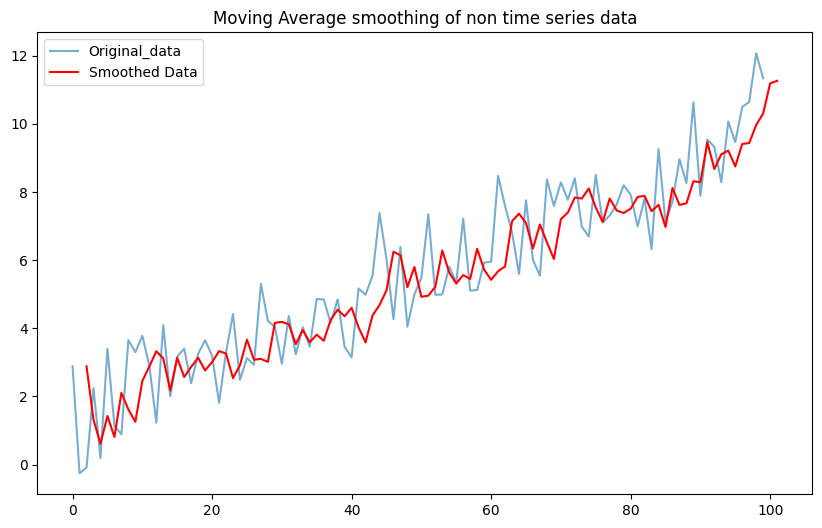

In [17]:

smoothed_data = ema_recursive(data, 0.5)
plt.figure(figsize= (10, 6))
plt.plot(data, label= 'Original_data', alpha= 0.6)
plt.plot(np.arange(len(smoothed_data)) + 2, smoothed_data, label= 'Smoothed Data', color= 'red')
plt.legend()
plt.title("Moving Average smoothing of non time series data")
plt.show()